In [0]:
import pandas as pd
import numpy as np

# Read all data and set hn as index

In [396]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv')
df = df.set_index('hn')
df.head()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,pchemo,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,0.0,5.0,3.0,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,0.0,5.0,1.0,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,0.0,5.0,4.0,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,0.0,3.0,3.0,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,0.0,0.0,1.0,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Data Preprocessing

Check number of data

In [397]:
df.shape

(1723, 23)

Check any missing data in each column

In [398]:
df.isnull().sum(axis=0)

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
appearance    101
stage          24
pchemo          1
Wardsize      145
finalhisto     10
nodeyiel       12
RHlvsi        366
depth         489
size          114
utmet          98
vgmargin       96
vgmet          97
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

Delete column with missing data

In [399]:
df_clean_column = df.drop(['appearance','Wardsize','RHlvsi','depth'],axis = 1)
df_clean_column.isnull().sum(axis=0)

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
stage          24
pchemo          1
finalhisto     10
nodeyiel       12
size          114
utmet          98
vgmargin       96
vgmet          97
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

Delete row with at least 1 missing data

In [0]:
df_clean = df_clean_column.dropna(axis = 0)

Total Clean Data

In [401]:
df_clean.shape

(1544, 19)

Check number of sample in pelvicme class 

In [402]:
pel_class = np.unique(df_clean['pelvicme'])
pel_class

array([0., 1., 3.])

In [403]:
pel_value = [sum(df_clean['pelvicme']==pel_class[0]),
             sum(df_clean['pelvicme']==pel_class[1]),
             sum(df_clean['pelvicme']==pel_class[2]) ]
pel_value

[1220, 304, 20]

Create dataset for pelvicme dataset by remove sample with label as 3

In [404]:
removeIndex = df_clean.index[df_clean['pelvicme']==3]
pelvicme = df_clean.drop(removeIndex)
pelvicme.shape

(1524, 19)

Separate pelviceme dataset into data (X) and label (y)

In [0]:
y = pelvicme['pelvicme'].values
X = pelvicme.drop(['pelvicme'],axis = 1).values

Randomly choose 200 samples of class 1 (positive) as training data and the rest as test data

In [406]:
import random
random.seed(1)
positive_index = np.where(y==1)[0]
negative_index = np.where(y==0)[0]
pos_train_index = random.sample(list(positive_index),200)
pos_test_index = list(set(positive_index) - set(pos_train_index))

print("All dataset: "+str(len(positive_index))+" "+str(len(negative_index)))
print("Positive test dataset: "+str(len(pos_test_index)))

All dataset: 304 1220
Positive test dataset: 104


Randomly separate negative dataset into 5 parts to create 5 training datasets consisted of 200 samples

In [407]:
neg_train_index1 = random.sample(list(negative_index),200)
neg_tmp_index = list(set(negative_index) - set(neg_train_index1))

neg_train_index2 = random.sample(list(neg_tmp_index),200)
neg_tmp_index = list(set(neg_tmp_index) - set(neg_train_index2))

neg_train_index3 = random.sample(list(neg_tmp_index),200)
neg_tmp_index = list(set(neg_tmp_index) - set(neg_train_index3))

neg_train_index4 = random.sample(list(neg_tmp_index),200)
neg_tmp_index = list(set(neg_tmp_index) - set(neg_train_index4))

neg_train_index5 = random.sample(list(neg_tmp_index),200)
neg_tmp_index = list(set(neg_tmp_index) - set(neg_train_index5))

neg_test_index = neg_tmp_index
print("Negative test dataset: "+str(len(neg_test_index)))

Negative test dataset: 220


Create 5 training dataset and 1 test dataset

In [408]:
X_train1 = np.concatenate((X[neg_train_index1,:],X[pos_train_index,:]),axis=0)
y_train1 = np.concatenate((y[neg_train_index1],y[pos_train_index]),axis=0)

X_train2 = np.concatenate((X[neg_train_index2,:],X[pos_train_index,:]),axis=0)
y_train2 = np.concatenate((y[neg_train_index2],y[pos_train_index]),axis=0)

X_train3 = np.concatenate((X[neg_train_index3,:],X[pos_train_index,:]),axis=0)
y_train3 = np.concatenate((y[neg_train_index3],y[pos_train_index]),axis=0)

X_train4 = np.concatenate((X[neg_train_index4,:],X[pos_train_index,:]),axis=0)
y_train4 = np.concatenate((y[neg_train_index4],y[pos_train_index]),axis=0)

X_train5 = np.concatenate((X[neg_train_index5,:],X[pos_train_index,:]),axis=0)
y_train5 = np.concatenate((y[neg_train_index5],y[pos_train_index]),axis=0)

X_train5.shape, y_train5.shape

((400, 18), (400,))

In [409]:
X_test = np.concatenate((X[neg_test_index,:],X[pos_test_index,:]),axis=0)
y_test = np.concatenate((y[neg_test_index],y[pos_test_index]),axis=0)
X_test.shape, y_test.shape

((324, 18), (324,))

Data normalization to range of (-1 to 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train1)
X_train_norm = scaler.transform(X_train1)
y_train = y_train1
X_test_norm = scaler.transform(X_test)

In [0]:
X_train_norm2 = scaler.transform(X_train2)
X_train_norm3 = scaler.transform(X_train3)
X_train_norm4 = scaler.transform(X_train4)
X_train_norm5 = scaler.transform(X_train5)

# Logistic Regression 

10-Folds Cross Validation Training Accuracy

In [412]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(random_state=0, solver='lbfgs')
np.mean(cross_val_score(clf, X_train_norm, y_train, cv=10))

0.7024999999999999

Test Accuracy

In [413]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf.fit(X_train_norm, y_train)
y_predict = clf.predict(X_test_norm)
sum(y_test == y_predict)/len(y_test)

0.7345679012345679

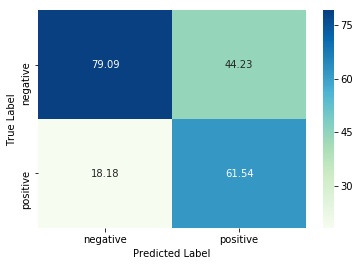

In [414]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [415]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.81      0.79      0.80       220
    positive       0.58      0.62      0.60       104

    accuracy                           0.73       324
   macro avg       0.70      0.70      0.70       324
weighted avg       0.74      0.73      0.74       324



# Lasso

10-Folds Cross Validation Training Accuracy

In [442]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
clf = Lasso()
clf.fit(clf, X_train_norm, y_train)
train_score=clf.score(X_train_norm,y_train)



ValueError: ignored

Test Accuracy

In [417]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf.fit(X_train_norm, y_train)
y_predict = clf.predict(X_test_norm)
sum(y_test == y_predict)/len(y_test)

0.0

In [418]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

ValueError: ignored

In [0]:
print(classification_report(y_test, y_predict, target_names=target_names))

# Ridge

10-Folds Cross Validation Training Accuracy

In [433]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
clf = linear_model.Ridge(alpha=0.1,random_state=0)
clf.fit(X_train_norm,y_train)

np.mean((cross_val_score(clf, X_train_norm, y_train, cv=10)))


0.0

Test Accuracy

In [419]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf.fit(X_train_norm, y_train)
y_predict = clf.predict(X_test_norm)
sum(y_test == y_predict)/len(y_test)

0.0

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [0]:
print(classification_report(y_test, y_predict, target_names=target_names))

# Support Vector Machine

10-Folds Cross Validation Training Accuracy

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
clf = SVC(gamma=0.25)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
np.mean(cross_val_score(clf, X_train_norm, y_train, cv=10))

Test Accuracy

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf.fit(X_train_norm, y_train)
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [0]:
print(classification_report(y_test, y_predict, target_names=target_names))

# Support Vector Machine Grid Search

10-Folds Cross Validation Training Accuracy

In [478]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
parameters = {'C':[2**0,2**1,2**2,2**3,2**4],
              'gamma':[2**(-4),2**(-3),2**(-2),2**(-1),2**0,2**1,2**2,2**3,2**4]}
svm = GridSearchCV(svm,parameters,scoring='accuracy',cv=10)
svm.fit(X_train_norm, y_train)
svm.best_params_
svm.best_score_


0.7075

In [496]:

y_pred = svm.predict(X_test_norm)
y_predict = clf.predict(X_test_norm)
accuracy_score(y_test, y_predict)

TypeError: ignored

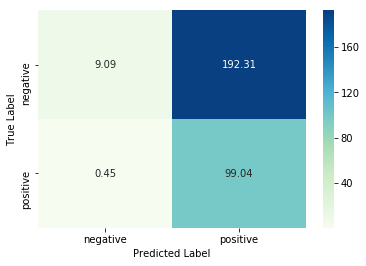

In [485]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

TypeError: ignored

# Naive Bayes

10-Folds Cross Validation Training Accuracy

In [458]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
clf = GaussianNB()
np.mean(cross_val_score(clf,X_train_norm,y_train,cv=10))

0.555

test

In [459]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
clf.fit(X_train_norm,y_train)
y_predict = clf.predict(X_test_norm)
taget_names = ['negative','positive']
sum(y_test == y_predict)/len(y_test)

0.37962962962962965

# Random Forest

10-Folds Cross Validation Training Accuracy

In [501]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf =  RandomForestClassifier(n_estimators=500, min_samples_split=2, random_state=0)
np.mean(cross_val_score(clf, X_train_norm, y_train, cv=10))

0.6924999999999999

Test Accuracy

In [502]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf.fit(X_train_norm, y_train)
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

0.7283950617283951

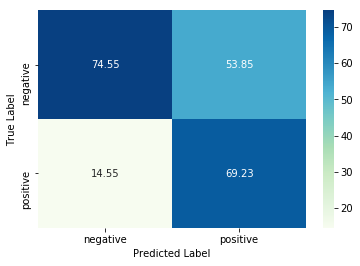

In [503]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [504]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.84      0.75      0.79       220
    positive       0.56      0.69      0.62       104

    accuracy                           0.73       324
   macro avg       0.70      0.72      0.70       324
weighted avg       0.75      0.73      0.73       324



# Desision Trees

10-Folds Cross Validation Training Accuracy

In [0]:
import matplotlib.pyplot as plt

In [506]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf =  DecisionTreeClassifier(random_state=0,max_depth=4,min_samples_leaf=10)

np.mean(cross_val_score(clf, X_train_norm, y_train, cv=10))



0.7075

Draw Trees

In [0]:
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive

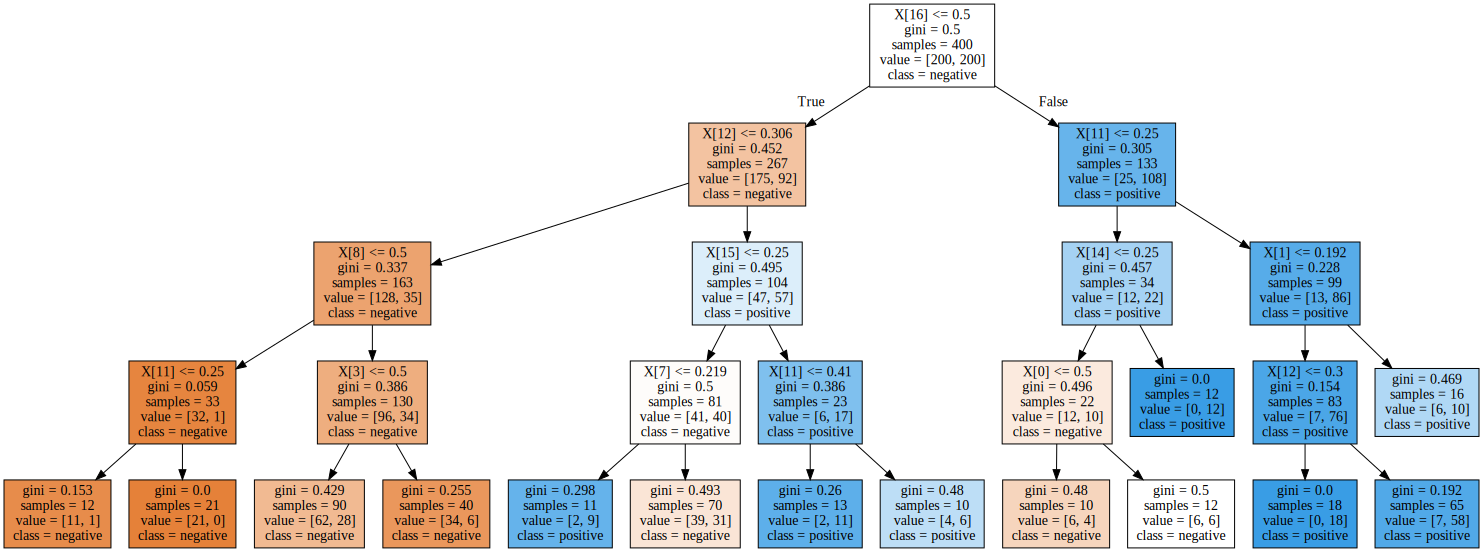

In [508]:
clf.fit(X_train_norm, y_train)

graph = Source(tree.export_graphviz(clf, out_file=None
, class_names=['negative', 'positive']
   , filled = True))


display(SVG(graph.pipe(format='svg')))



Test Accuracy

In [509]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf.fit(X_train_norm, y_train)
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

0.7407407407407407

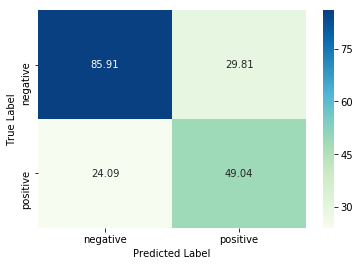

In [510]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [0]:
print(classification_report(y_test, y_predict, target_names=target_names))

# KNN

10-Folds Cross Validation Training Accuracy

In [498]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
clf =  KNeighborsClassifier(n_neighbors=1)
np.mean(cross_val_score(clf, X_train_norm, y_train, cv=10))

0.5675

Test Accuracy

In [499]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf.fit(X_train_norm, y_train)
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

0.6419753086419753

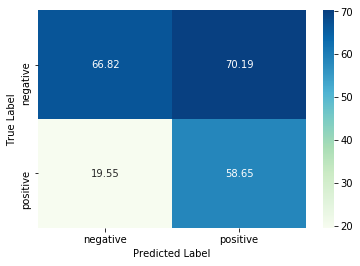

In [500]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [511]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.78      0.86      0.82       220
    positive       0.62      0.49      0.55       104

    accuracy                           0.74       324
   macro avg       0.70      0.67      0.68       324
weighted avg       0.73      0.74      0.73       324



# XGBoost

10-Folds Cross Validation Training Accuracy

In [0]:
#!pip install xgboost  // If you dont have XGBoost
import xgboost as xgb
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.0001, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
np.mean(cross_val_score(clf, X_train_norm, y_train, cv=10))

Test Accuracy

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
clf.fit(X_train_norm, y_train)
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [0]:
print(classification_report(y_test, y_predict, target_names=target_names))

# Deep Learning

Install Tensorflow 2.0, if you dont have it, pls uncomment

In [0]:
#!pip install tensorflow==2.0.0-beta1
import tensorflow as tf

Create Deep Learning Model 
Using Sequential = Feed-Forward Model
1. The first hidden layer contains 16 hidden nodes connected to input layers with 18 nodes corresponding to number of features
2. Other layers is chosen based on 2^1, 2^2, 2^3 concept with 'relu' activation function
3. Output layer is sigmoid because it can output value which is close 0 and 1 (Binary Class)

In [513]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=(18,)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                304       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 3         
Total params: 489
Trainable params: 489
Non-trainable params: 0
_________________________________________________________________


Set up Optimizer to 'adam' with is argubly the best one now, the loss function is set to binary_crossentropy (Binary Classification)

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train model around 20 epochs with batchsize 20


In [0]:
model.fit(X_train_norm, y_train, epochs=20, batch_size=20)

The model train accuracy is stable aroud 75, so stop train the model

Test Accuracy

In [0]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [0]:
print(classification_report(y_test, y_predict, target_names=target_names))

#Deep Learning with Early Stop to Prevent Overfitting

Split validation data from training data and also create new training data

In [0]:
from sklearn.model_selection import train_test_split
X_train_over, X_val_norm, y_train_over, y_val = train_test_split(X_train_norm, y_train, test_size=0.20, random_state=1)

Create model again

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=(18,)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.summary()

Create optimizer again

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Create early stop function to prevent overfitting
if the accuracy of validation data does not increase for 5 epoch (patience = 5), use the latest best validation accuracy model

In [0]:
overfit_prevent = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


Train model with early stop

In [0]:
model.fit(X_train_over, y_train_over, epochs= 100, batch_size = 20, validation_data= (X_val_norm, y_val), callbacks=[overfit_prevent])

In [0]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)

# Deep Learning for imbalanced problem

In [0]:
import tensorflow as tf
model_ibp = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=(18,)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')    
])
model_ibp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model_ibp.fit(X_train_norm, y_train, epochs=5)

In [0]:
model_ibp.fit(X_train_norm2, y_train2, epochs=5)

In [0]:
model_ibp.fit(X_train_norm3, y_train3, epochs=5)

In [0]:
model_ibp.fit(X_train_norm4, y_train4, epochs=5)

In [0]:
model_ibp.fit(X_train_norm5, y_train5, epochs=5)

In [0]:
y_predict = np.round(model_ibp.predict(X_test_norm))
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)

# Voting

In [522]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=0)
model2 = DecisionTreeClassifier(random_state=0)
model3 = SVC(random_state=0)
model4 = GaussianNB()
model5 = RandomForestClassifier(random_state=0)
model6 = KNeighborsClassifier(n_neighbors=1)
model7 = xgb.XGBClassifier(random_state=0)


model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('svc', model3), ('nb', model4),('rf', model5), ('knn', model6), ('xg', model7)], voting='hard')
model.fit(X_train_norm, y_train)
model.score(X_test_norm,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7191358024691358

# Save Data to SVM format for Optimization

In [0]:
#from sklearn.datasets import dump_svmlight_file
#dump_svmlight_file(X_train_norm, y_train, 'training.svm',zero_based=False)
#dump_svmlight_file(X_test_norm,y_test,'test.svm',zero_based=False)